# Parson's Recreation for Individual Models

In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs

## Loading in data

In [2]:
cat = pd.read_csv('/data/keeling/a/cristi/a/esm_data/cmip6_catalog.csv')
cat

,activity_id,branch_method,branch_time_in_child,branch_time_in_parent,experiment,experiment_id,frequency,grid,grid_label,institution_id,...,standard_name,long_name,units,vertical_levels,init_year,start_time,end_time,time_range,path,version
0,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,surface_upward_latent_heat_flux,Surface Upward Latent Heat Flux,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
1,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,surface_upward_sensible_heat_flux,Surface Upward Sensible Heat Flux,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
2,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,surface_downwelling_longwave_flux_in_air,Surface Downwelling Longwave Radiation,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
3,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,surface_upwelling_longwave_flux_in_air,Surface Upwelling Longwave Radiation,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
4,CMIP,standard,0.0,0.0,abrupt quadrupling of CO2,abrupt-4xCO2,mon,native atmosphere N96 grid (144x192 latxlon),gn,CSIRO-ARCCSS,...,toa_outgoing_longwave_flux,TOA Outgoing Longwave Radiation,W m-2,1.0,NaN,0950-01-16 12:00:00,1099-12-16 12:00:00,0950-01-16 12:00:00-1099-12-16 12:00:00,/data/cristi/a/cristi/esm_data/cmip6/ACCESS-CM...,v0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,ScenarioMIP,standard,59400.0,59400.0,update of RCP8.5 based on SSP5,ssp585,mon,Native N96 grid; 192 x 144 longitude/latitude,gn,MOHC,...,surface_downwelling_shortwave_flux_in_air,Surface Downwelling Shortwave Radiation,W m-2,1.0,NaN,2015-01-16 00:00:00,2100-12-16 00:00:00,2015-01-16 00:00:00-2100-12-16 00:00:00,/data/cristi/a/cristi/esm_data/cmip6/UKESM1-0-...,v0
11430,ScenarioMIP,standard,59400.0,59400.0,update of RCP8.5 based on SSP5,ssp585,mon,Native N96 grid; 192 x 144 longitude/latitude,gn,MOHC,...,toa_incoming_shortwave_flux,TOA Incident Shortwave Radiation,W m-2,1.0,NaN,2015-01-16 00:00:00,2100-12-16 00:00:00,2015-01-16 00:00:00-2100-12-16 00:00:00,/data/cristi/a/cristi/esm_data/cmip6/UKESM1-0-...,v0
11431,ScenarioMIP,standard,59400.0,59400.0,update of RCP8.5 based on SSP5,ssp585,mon,Native N96 grid; 192 x 144 longitude/latitude,gn,MOHC,...,surface_upwelling_shortwave_flux_in_air,Surface Upwelling Shortwave Radiation,W m-2,1.0,NaN,2015-01-16 00:00:00,2100-12-16 00:00:00,2015-01-16 00:00:00-2100-12-16 00:00:00,/data/cristi/a/cristi/esm_data/cmip6/UKESM1-0-...,v0
11432,ScenarioMIP,standard,59400.0,59400.0,update of RCP8.5 based on SSP5,ssp585,mon,Native N96 grid; 192 x 144 longitude/latitude,gn,MOHC,...,toa_outgoing_shortwave_flux,TOA Outgoing Shortwave Radiation,W m-2,1.0,NaN,2015-01-16 00:00:00,2100-12-16 00:00:00,2015-01-16 00:00:00-2100-12-16 00:00:00,/data/cristi/a/cristi/esm_data/cmip6/UKESM1-0-...,v0


## CanESM r1i1p1f1

In [11]:
path_canesm_control = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id'].str.contains('Control')) &
               (cat['source_id']=='CanESM5') &
               (cat['variant_label']=='r1i1p1f1')]['path'].to_list()
path_canesm_control = path_canesm_control[1:] # First two files are copies of each other
path_canesm_control

['/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_520101-620012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_540101-560012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_560101-580012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_580101-600012.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/piControl/r1i1p1f1/tas_Amon_CanESM5_piControl_r1i1p1f1_gn_600101-620012.nc']

In [16]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

dset_list_canesm_control = []

for file in path_canesm_control:
    ds = xr.open_dataset(file)
    ds = ds.tas.interp(lat=new_lats,lon=new_lons)
    dset_list_canesm_control.append(ds)

In [17]:
canesm_control_ds = xr.concat(dset_list_canesm_control, dim='time', coords='minimal', compat='override')
canesm_control_ds

<xarray.DataArray 'tas' (time: 21600, lat: 88, lon: 179)>
array([[[248.47676926, 248.23956786, 247.99810656, ..., 249.48870117,
         249.24198279, 248.98708932],
        [248.32550863, 247.92152079, 247.57209653, ..., 250.16679686,
         249.68724792, 249.20676176],
        [247.628947  , 247.08414588, 246.63603833, ..., 250.06167812,
         249.43169963, 248.81753341],
        ...,
        [241.7883766 , 242.30465107, 242.76446638, ..., 239.50405786,
         240.05321846, 240.62731302],
        [241.79001622, 242.01869329, 242.19770795, ..., 240.53132627,
         240.89125994, 241.23692038],
        [242.0675244 , 242.18481633, 242.26122206, ..., 241.49623913,
         241.68512692, 241.84877712]],

       [[237.20443977, 236.96226686, 236.71971423, ..., 238.33340194,
         238.03154947, 237.73963945],
        [235.96643628, 235.59917477, 235.27705561, ..., 237.87394499,
         237.32810064, 236.81679501],
        [235.33627835, 234.93439938, 234.62812973, ..., 237.5660348 ,
         236.89709703, 236.29453001],
...
        [247.41363702, 247.85418111, 248.17888463, ..., 245.65264229,
         246.10198858, 246.47850499],
        [248.1347903 , 248.44609738, 248.62821766, ..., 246.82438206,
         247.12587494, 247.43223407],
        [247.5701018 , 247.71990845, 247.79713425, ..., 246.98519945,
         247.13008242, 247.26803377]],

       [[250.97594993, 250.79764525, 250.60875459, ..., 251.75837734,
         251.55481881, 251.35335232],
        [250.55657648, 250.25096906, 249.9517129 , ..., 252.01165313,
         251.61866665, 251.21224833],
        [249.7328767 , 249.39051131, 249.09542607, ..., 251.42475172,
         250.97649903, 250.51488418],
        ...,
        [235.18878813, 235.50671345, 235.70873042, ..., 233.58078648,
         233.93374419, 234.39574861],
        [233.21137808, 233.34387488, 233.46064128, ..., 232.51708631,
         232.73522962, 232.91212993],
        [233.2401387 , 233.275921  , 233.28659679, ..., 233.06343842,
         233.12681118, 233.14105115]]])
Coordinates:
    height   float64 2.0
  * time     (time) object 5201-01-16 12:00:00 ... 6200-12-16 12:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        ST+273.16, CMIP_table_comment: near-surface (usually, 2 m...
    long_name:      Near-Surface Air Temperature
    original_name:  ST
    standard_name:  air_temperature
    units:          K

In [19]:
canesm_control_mean = canesm_control_ds.rolling(time=300, center=True).mean('time') #12*25 = 300 - 25 Years
canesm_control_mean

<xarray.DataArray 'tas' (time: 21600, lat: 88, lon: 179)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
    height   float64 2.0
  * time     (time) object 5201-01-16 12:00:00 ... 6200-12-16 12:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        ST+273.16, CMIP_table_comment: near-surface (usually, 2 m...
    long_name:      Near-Surface Air Temperature
    original_name:  ST
    standard_name:  air_temperature
    units:          K

In [20]:
canesm_control = canesm_control_mean.std('time')
canesm_control.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.15552832, 0.15674579, 0.15764796, ..., 0.1511692 , 0.15221362,
        0.1532674 ],
       [0.17459755, 0.17653491, 0.17748681, ..., 0.16637398, 0.16841552,
        0.1703874 ],
       [0.18497969, 0.18589492, 0.18580571, ..., 0.17380175, 0.17692956,
        0.18012153],
       ...,
       [0.49845151, 0.50755712, 0.51514474, ..., 0.45042565, 0.4643295 ,
        0.47742404],
       [0.47212773, 0.4786956 , 0.48472575, ..., 0.43960511, 0.44846543,
        0.45688584],
       [0.42378882, 0.42668147, 0.42920094, ..., 0.40988109, 0.4136206 ,
        0.41715226]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

Text(0.5, 1.0, 'Interdecadal Variability (>25 yrs) - CanESM5')

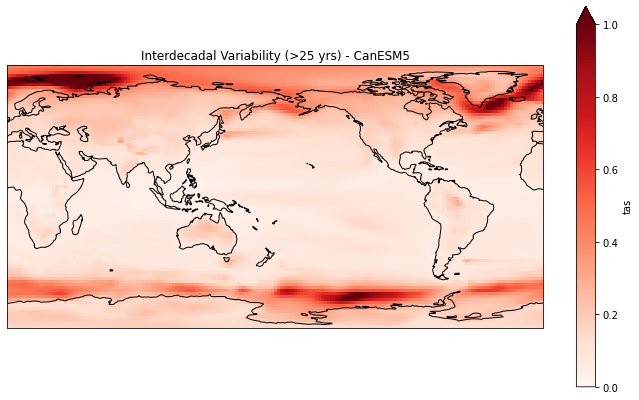

In [23]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
canesm_control.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', vmin=0, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Interdecadal Variability (>25 yrs) - CanESM5')

In [31]:
path_canesm_hist = cat.loc[(cat['variable_id']=='tas') &
               (cat['activity_id']=='CMIP') &
               (cat['frequency']=='mon') & 
               (cat['experiment_id']=='historical') &
               (cat['source_id']=='CanESM5')].head(5)['path'].to_list()
path_canesm_hist

['/data/cristi/a/cristi/esm_data/cmip6/CanESM5/historical/r10i1p1f1/tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/historical/r10i1p2f1/tas_Amon_CanESM5_historical_r10i1p2f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/historical/r11i1p1f1/tas_Amon_CanESM5_historical_r11i1p1f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/historical/r11i1p2f1/tas_Amon_CanESM5_historical_r11i1p2f1_gn_185001-201412.nc',
 '/data/cristi/a/cristi/esm_data/cmip6/CanESM5/historical/r12i1p1f1/tas_Amon_CanESM5_historical_r12i1p1f1_gn_185001-201412.nc']

In [ ]:
new_lats=np.arange(-87,88,2)
new_lons=np.arange(1,359,2)

dset_list_canesm_hist = []

for file in path_canesm_hist:
    ds = xr.open_dataset(file)
    ds_tas_rolling = ds.tas.interp(lat=new_lats,lon=new_lons).rolling(time=300, center=True).mean('time')
    ds_tas = ds_tas_rolling.std('time')
    ds_tas['name'] = name # Creating a new dimension for each ensemble member
    dset_list_control.append(ds_tas)